# Term Project   2024105276 전형진

주제: 포스트코로나시대를 맞이하여 산업별 주가, 시장규모의 변화<br>


# (1) 주제 선정 이유

본인은 세계 경제에 관심이 많아서 나스닥 NYSE뿐 아니라 SSE, HKEX, JPX등의 지수와 상장 회사등에 관심을 가지고 있고, 코로나 시대에 해당 상장 기업들의 주가/시총이 크게 요동치는것을 알게 되었다<br>

따라서 현재, 코로나가 거의 종식되었다고 판단할만한 시점에서, 코로나 전 후에 어떤 산업 어떤 시장이 성장하고 쇠퇴했는지 알아 추후 또다시 팬데믹 상황이 도래했을 때, 본인에게 조금더 이익이 되는 방향으로 투자를 할수 있도록 한다. 따라서 팬데믹 상황을 가정해 머신러닝 기법을 통해 어떤 종목을 투자할지 모의 투자까지 진행한다<br>

# (2) 가설 정의

Health 관련 주들은 전반적으로 우상향 할 것이며, 팬데믹 시대에도 꾸준한 성장을 보였을 IT/Chip Maker 업계들, 하락했을 Service관련 주들로 예상이 된다.<br>

몇개의 예시로 IT 기업으로 삼성전자, Health 기업으로 Celltrion, Service 기업으로 대한항공을 예시로 든다.<br>

# (3) 인터넷을 통한 데이터 획득

Finance Data Reader 라이브러리를 사용해 주식 정보를 가져와 Pandas를 통해 DataFrame의 형태로 가공한다<br>

 사용할 데이터프레임은 2019-01-01에서 2023-01-01 기간 동안의 데이터를 포함한다. 단 주식 시장은 KRX 기준으로 한다<br>

 데이터는 사용자가 원하는 종목의 코드를 입력하면 해당 종목의 코로나 시기 실제 주가와 예측 주가를 Plotting해 시각화 해주고, 사용자가 임의의 팬데믹 상황을 가정한 데이터를 가공하여 Input해주면 그 가정한 상황속에서의 주가변동을 시뮬레이션 해 Plotting 해준다<br>

 또힌 Johns Hopkins Medical Center 에서 제공하는 코로나 감염 현황을 가져온다<br>

In [4]:
import FinanceDataReader as fdr
import pandas as pd

#Finance Data Reader 테스트 코드

finance_df = fdr.StockListing('KRX')
finance_df



,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,75700,1,2200,2.99,74400,76400,74200,15706268,1186657003206,451912539035000,5969782550,STK
1,000660,KR7000660001,SK하이닉스,KOSPI,,194200,1,5000,2.64,189500,194600,188200,2982443,571760605900,141378059283000,728002365,STK
2,373220,KR7373220003,LG에너지솔루션,KOSPI,,332000,1,1000,0.30,330500,341000,329500,194056,64774809000,77688000000000,234000000,STK
3,005380,KR7005380001,현대차,KOSPI,,265000,1,12000,4.74,257500,270000,257000,1186533,315382033500,55495290615000,209416191,STK
4,207940,KR7207940008,삼성바이오로직스,KOSPI,,752000,1,22000,3.01,736000,756000,736000,49828,37406943000,53522848000000,71174000,STK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2805,002995,KR7002991008,금호건설우,KOSPI,,10200,1,190,1.90,10080,10200,10080,848,8582100,2981113200,292266,STK
2806,266170,KR7266170000,뿌리깊은나무들,KONEX,일반기업부,419,5,-73,-14.84,560,560,419,17164,7222687,2762159873,6592267,KNX
2807,217320,KR7217320001,썬테크,KONEX,일반기업부,2600,0,0,0.00,0,0,0,0,0,2730000000,1050000,KNX
2808,245450,KR7245450002,씨앤에스링크,KONEX,일반기업부,1498,2,-1,-0.07,1499,1499,1275,42,58727,2366780080,1579960,KNX


# (4) 분석을 위한 데이터 가공

코로나-19 감염자수 추이와 주식시장과의 상관관계를 알아보기 위해 Johns Hopkins Medical Center에서 제공하는 데이터를 사용해 대한민국 코로나-19 감염자 데이터 csv파일을 만든다<br>

또한 Finance Data Reader를 통해 코로나 전 2019-01-01 에서 2023-01-01 데이터를 분석하려는 기업의 코드를 입력합에 따라 데이터프레임 형식으로 가져와 Close 열을 추출해 사용한다.<br>

In [1]:
import pandas as pd

# Johns Hopkins University 데이터 URL
confirmed_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
deaths_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
recovered_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'


confirmed_df = pd.read_csv(confirmed_url)
deaths_df = pd.read_csv(deaths_url)
recovered_df = pd.read_csv(recovered_url)

country = 'Korea, South'
confirmed_df = confirmed_df[confirmed_df['Country/Region'] == country]
deaths_df = deaths_df[deaths_df['Country/Region'] == country]
recovered_df = recovered_df[recovered_df['Country/Region'] == country]

# 데이터 전처리
def preprocess_data(df):
    df = df.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1)
    df = df.T
    df.index = pd.to_datetime(df.index)
    df.columns = ['value']
    return df

confirmed_df = preprocess_data(confirmed_df)
deaths_df = preprocess_data(deaths_df)
recovered_df = preprocess_data(recovered_df)


covid_data = pd.DataFrame({
    'date': confirmed_df.index,
    'new_cases': confirmed_df['value'].diff().fillna(0),
    'deaths': deaths_df['value'].diff().fillna(0),
    'recovered': recovered_df['value'].diff().fillna(0)
})

covid_data.to_csv('covid_data_korea.csv', index=False)

/var/folders/vs/lsvdz_mj2mdc7y_snny_b3940000gn/T/ipykernel_10415/801728155.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/var/folders/vs/lsvdz_mj2mdc7y_snny_b3940000gn/T/ipykernel_10415/801728155.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.index = pd.to_datetime(df.index)
/var/folders/vs/lsvdz_mj2mdc7y_snny_b3940000gn/T/ipykernel_10415/801728155.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling ba

# (5) 분석 결과 도출

TensorFlow에서 제공하는 Long-Short-Term Model을 사용하여 위에서 추출한 코로나-19 감염자 데이터와 Finance Data Reader에서 가져온 데이터를 통해 감염자수 추이에 따른 주가 변동을 예측하는 모델을 학습시킨다.<br>

데이터의 80%는 학습용, 20%는 검증용으로 사용하였다.<br>

이때 입력 데이터(X)는 samples, timesteps, function을 포함하며 예측 목표(Y)는 다음날 종가 데이터이다.<br>

LSTM 모델은 RNN의 일종으로 주가같은 시계열 데이터처리에 특화되어있기에 해당 모델을 사용했다.<br>

임의의 펜데믹 상황을 시뮬레이션 하기 위해 해당 모델은 주어진 traindata에 대한 과적합을 방지해야 한다 따라서 Dropout layer를 설계하여 추가하였다.<br>

Adam optimizer와 MSE loss function을 사용해 최종 모델링을 거쳤다.<br>

시간적 여유가 있다면 epoch 값을 높여가면 정확성을 더욱 늘릴 수 있다.<br>

학습시 사용한 epoch 500회에서 손실함수 값이 마지막 회귀시 0.0008 정도로 만족스러웠기에 더 이상 epoch값을 늘리지 않았다.<br>

학습한 모델의 시뮬레이션 전에 해당 모델의 신뢰성을 위해 실제 주가 데이터와 같이 Plotting 하는 작업을 하여 정확도를 표현하였다.<br>


/var/folders/vs/lsvdz_mj2mdc7y_snny_b3940000gn/T/ipykernel_1037/3500205094.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Epoch 1/500


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1254
Epoch 2/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0131
Epoch 3/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0067
Epoch 4/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0060
Epoch 5/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0059
Epoch 6/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0054
Epoch 7/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0059
Epoch 8/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0052
Epoch 9/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0050
Epoch 10/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0050
Epoch 11/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0054
Epoch 12/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0047
Epoch 13/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0058
Epoch 14/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0041
Epoch 15/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0056
E

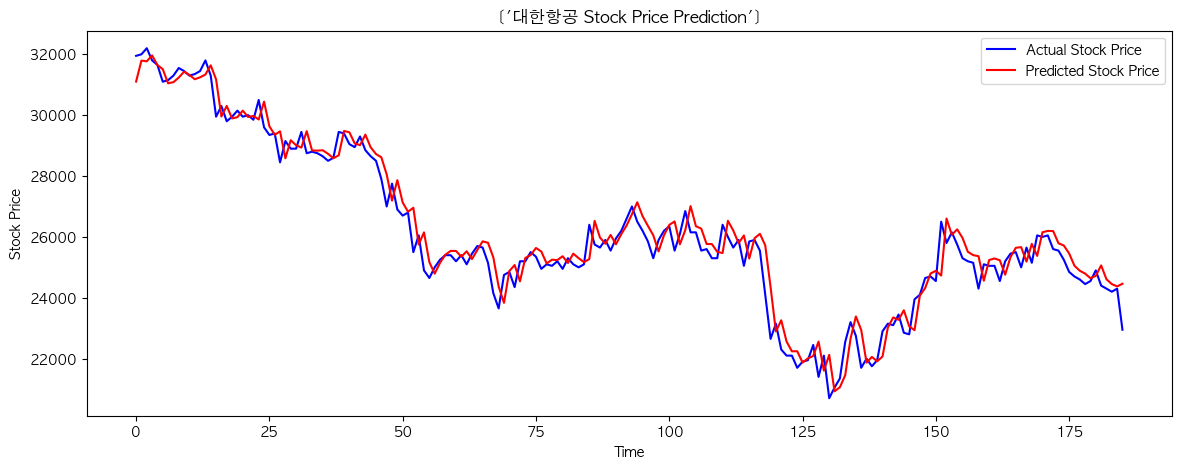

In [1]:
import numpy as np
import pandas as pd
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from datetime import datetime


#Matplotlib 한글 폰트 깨짐 해결
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

#삼성전자 코드 = 005930
#셀트리온 코드 = 068270
#대한항공 코드 = 003490
#하이닉스 코드 = 000660

code = input("분석하려는 기업의 코드를 입력하세요")

finance_df = fdr.StockListing('KRX')

filtered_df = finance_df[finance_df['Code'] == code]

name_result = filtered_df['Name'].values

stock_data = fdr.DataReader(code, '2019-01-01', '2023-01-01')
covid_data = pd.read_csv('covid_data_korea.csv')


scaler = MinMaxScaler()
stock_data_scaled = scaler.fit_transform(stock_data['Close'].values.reshape(-1, 1))


sequence_length = 60
X = []
y = []

for i in range(sequence_length, len(stock_data_scaled)):
    X.append(stock_data_scaled[i-sequence_length:i, 0])
    y.append(stock_data_scaled[i, 0])

X = np.array(X)
y = np.array(y)


train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=500, batch_size=32)


predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)


actual_stock_price = stock_data['Close'].values[train_size + sequence_length:]

plt.figure(figsize=(14, 5))
plt.plot(actual_stock_price, color='blue', label='Actual Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Stock Price')
plt.title(name_result + ' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend() 
plt.show()

위에서 학습시킨 모델을 통해 추후 임의의 펜데믹 상황에서의 주가변동을 예측하는 시뮬레이션을 제작한다.<br>

시뮬레이션을 위해 임의의 감염자수 데이터를 확진자수와 사망자수를 포함하는 임의의 데이터로 만들어 시뮬레이션 한다.<br>

임의로 만든 펜데믹 시뮬레이션의 확진자수 사망자수를 같이 Plotting 하여 비교가 되도록 한다.<br>

또한 확진자수를 Plotting 할 때 등락폭이 클 경우 한눈에 보기가 어려우므로 Numpy 에서 제공하는 다향회귀 함수 polyfit을 통해 곡선으로 추세선을 표현한다<br>
선형회귀로는 추세선 표현이 적절히 되지 않아 다향 회귀를 사용하였다.<br>

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


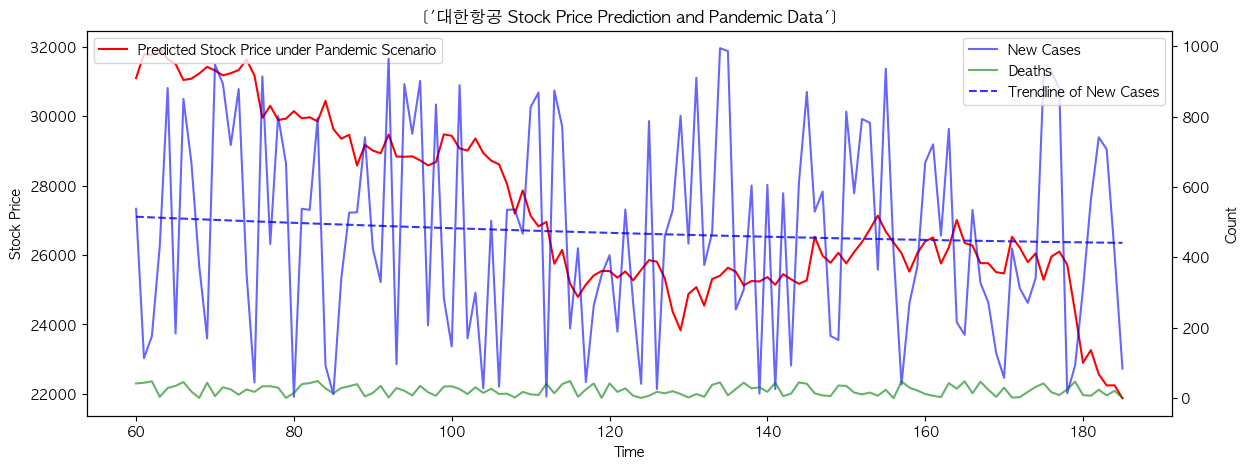

In [4]:

pandemic_scenario_length = len(X_test)  
new_cases = np.random.randint(0, 1000, size=(pandemic_scenario_length, 1)) 
deaths = np.random.randint(0, 50, size=(pandemic_scenario_length, 1)) 


simulated_data = np.zeros((pandemic_scenario_length, X_test.shape[1] + 2))  
simulated_data[:, :X_test.shape[1]] = X_test.squeeze()  
simulated_data[:, X_test.shape[1]] = new_cases.squeeze()  
simulated_data[:, X_test.shape[1] + 1] = deaths.squeeze()  

simulated_data = simulated_data[:, :1]


sequence_length = 60
X_simulated = []

for i in range(sequence_length, len(simulated_data)):
    X_simulated.append(simulated_data[i-sequence_length:i])

X_simulated = np.array(X_simulated)

predicted_pandemic_stock_price = model.predict(X_simulated)
predicted_pandemic_stock_price = scaler.inverse_transform(predicted_pandemic_stock_price)


fig, pandemic_stock = plt.subplots(figsize=(14, 5))

x_values = np.arange(sequence_length, pandemic_scenario_length)
coefficients = np.polyfit(x_values, new_cases[sequence_length:].flatten(), 2)
trendline = np.polyval(coefficients, x_values)

pandemic_stock.plot(x_values, predicted_pandemic_stock_price, color='red', label='Predicted Stock Price under Pandemic Scenario')
pandemic_stock.set_xlabel('Time')
pandemic_stock.set_ylabel('Stock Price')
pandemic_stock.legend(loc='upper left')


pandemic_cases = pandemic_stock.twinx()
pandemic_cases.plot(x_values, new_cases[sequence_length:], color='blue', label='New Cases', alpha=0.6)
pandemic_cases.plot(x_values, deaths[sequence_length:], color='green', label='Deaths', alpha=0.6)
pandemic_cases.plot(x_values, trendline, color='blue', linestyle='--', label='Trendline of New Cases', alpha=0.8)
pandemic_cases.set_ylabel('Count')
pandemic_cases.legend(loc='upper right')

plt.title(name_result + ' Stock Price Prediction and Pandemic Data')
plt.show()


# 대한항공 분석 결과<br>

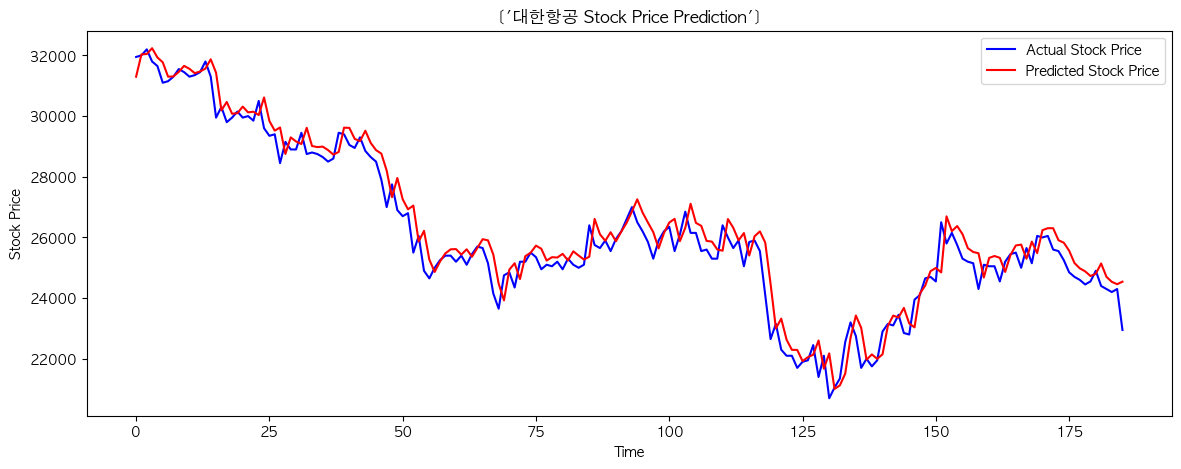<br>


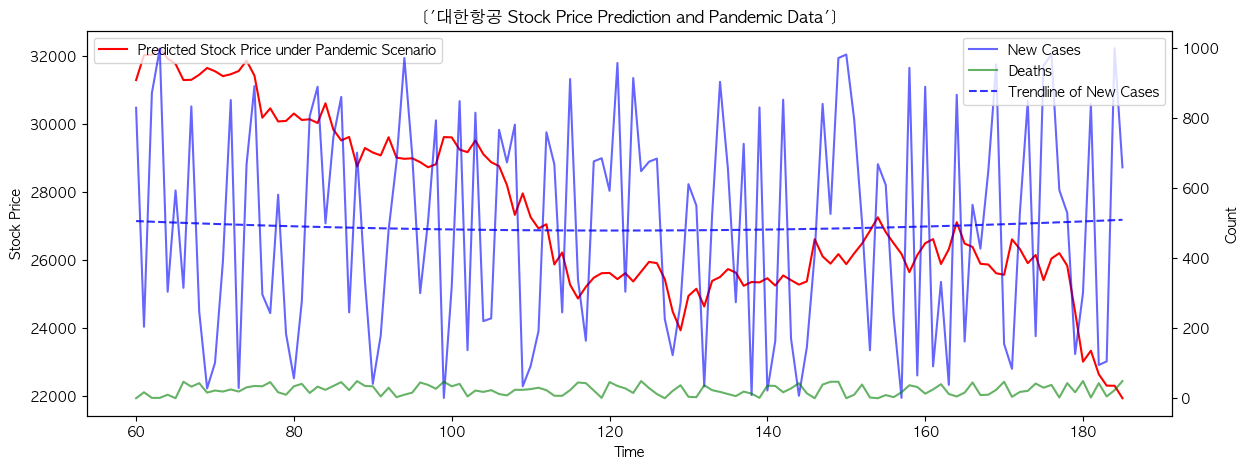<br>

# 셀트리온 분석 결과<br>


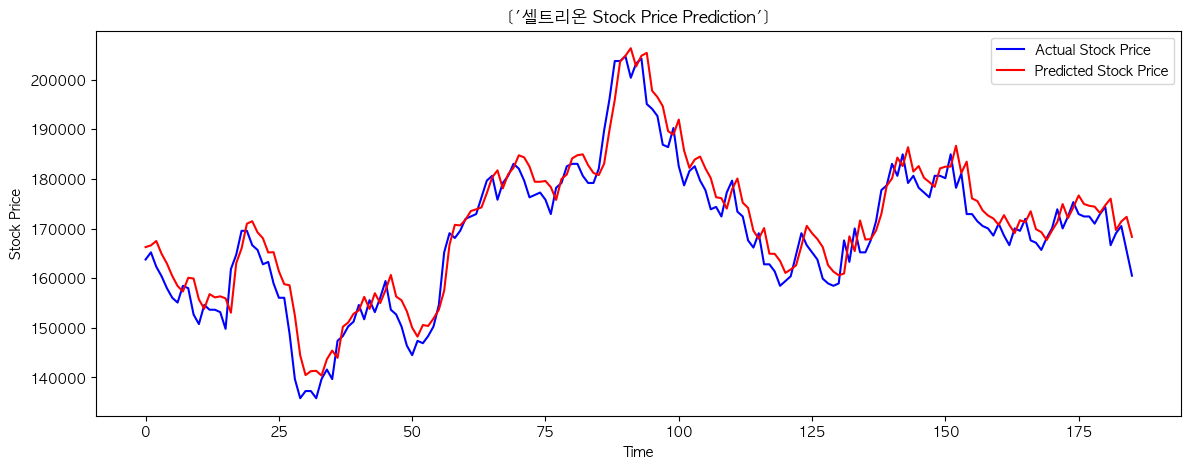<br>



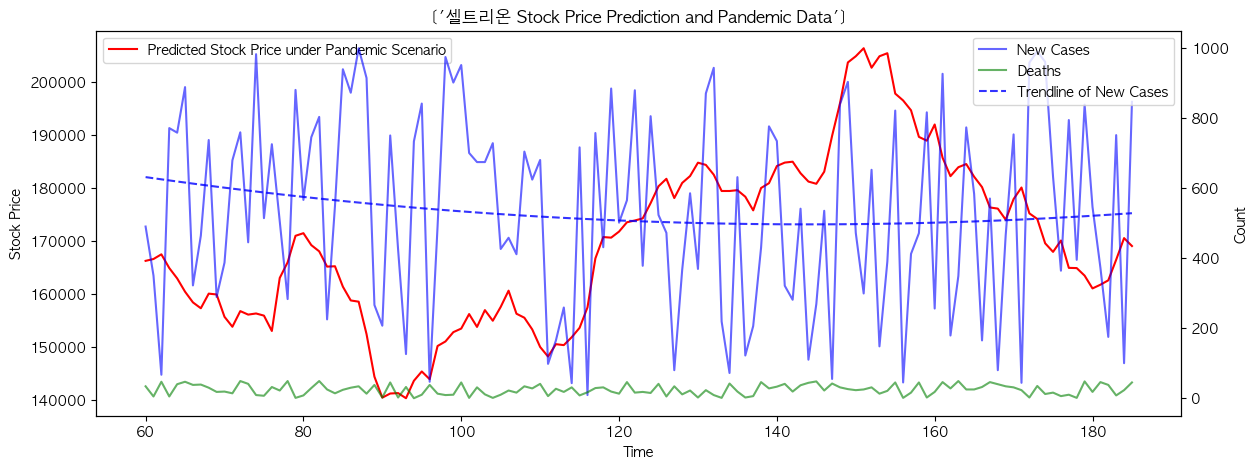<br>

# 삼성전자 분석 결과<br>

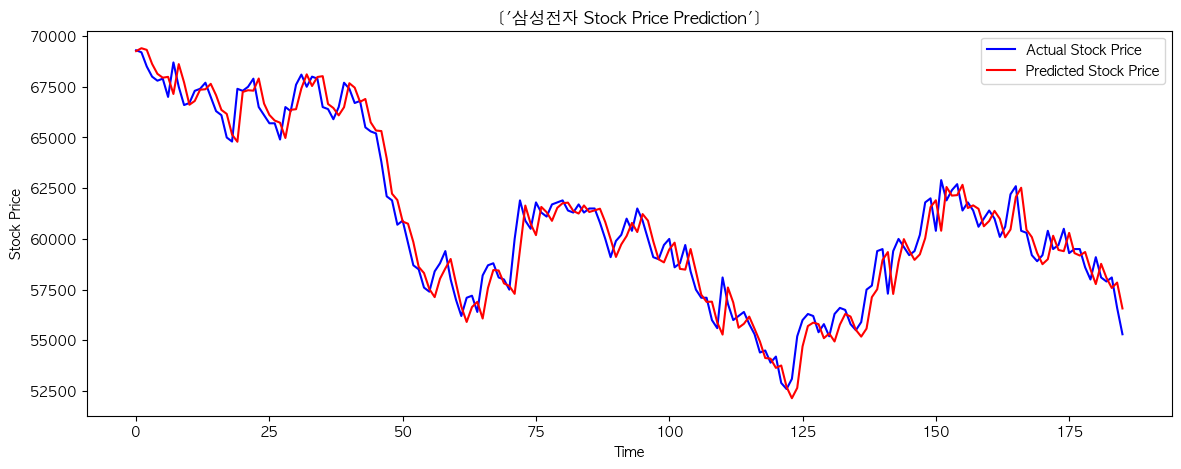<br>

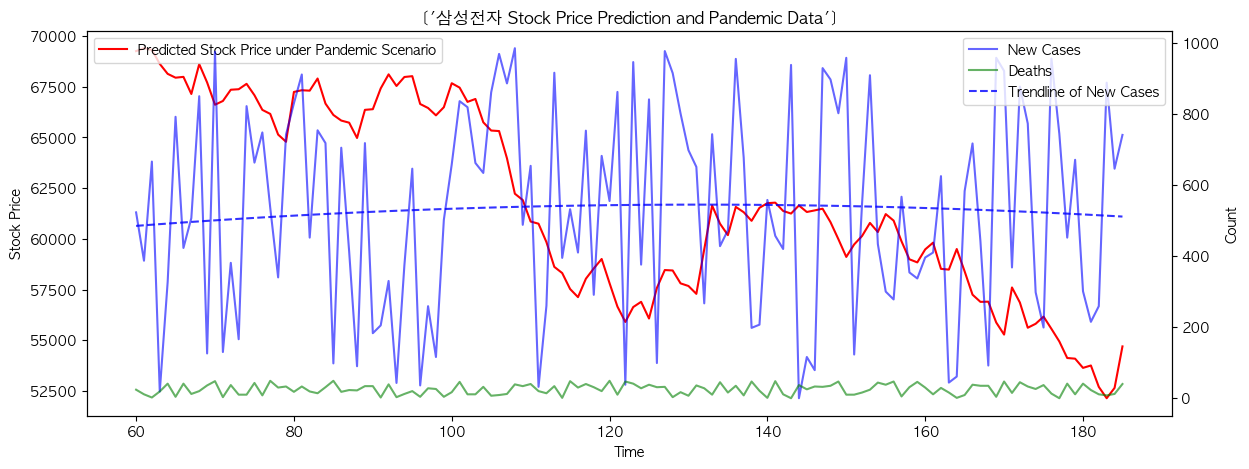<br>

# SK 하이닉스 분석 결과<br>

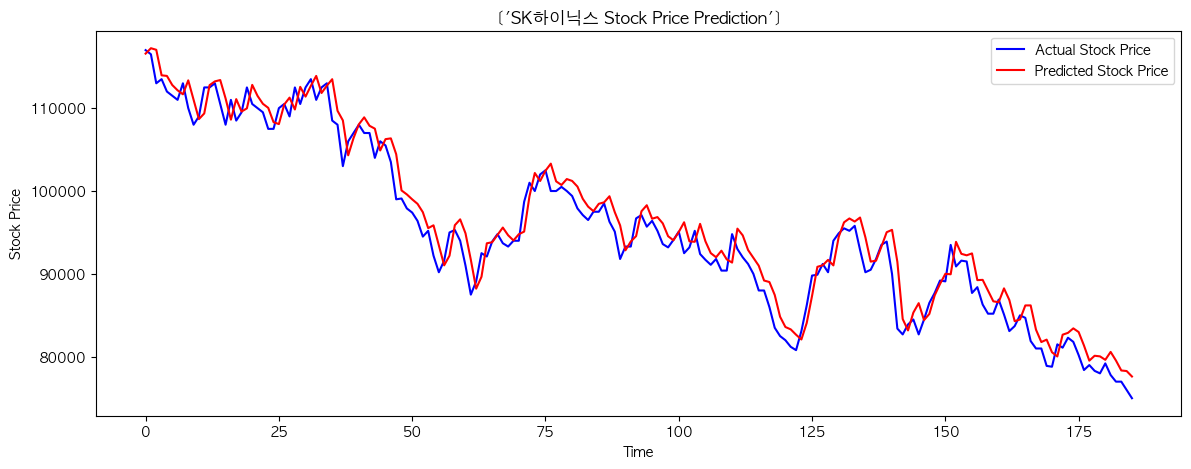<br>

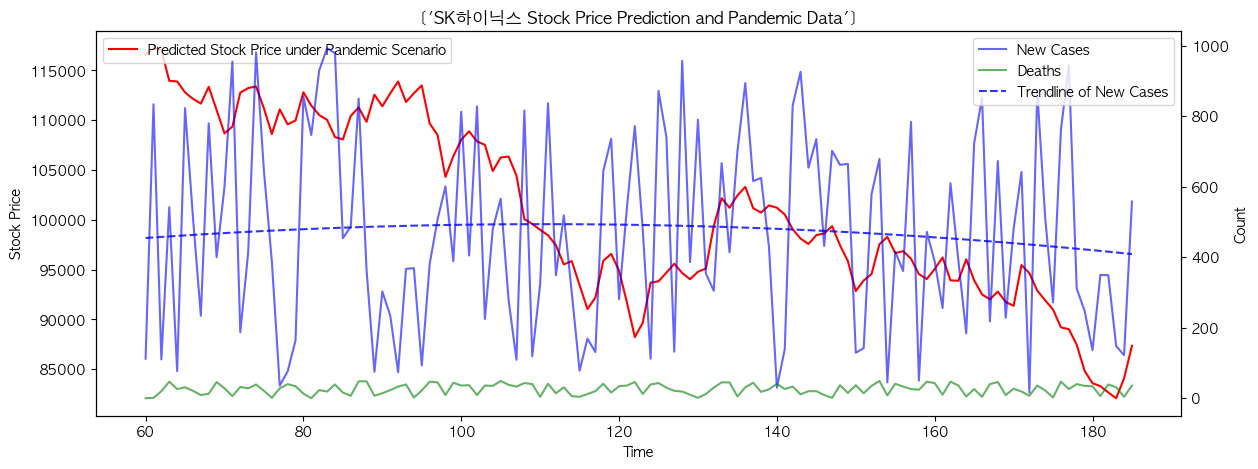<br>

# (6) 결론

셀트리온으로 대표되는 바이오주식은 시뮬레이션 결과 예상과 마찬가지로 어느정도 확진자가 누적됨에 따라 주가가 급등하는 구간이 생기는 것을 볼 수 있었다.<br>

마찬가지로 대한항공과 같은 서비스업은 시뮬레이션 결과 확진자가 누적됨에 따라 주가가 급락하는 모습을 보였다.<br>

반면에 삼성전자로 대표되는 IT 주식의 주가는 확진자가 누적됨에 따라 감소하는 경향을 보였다.<br>

교차 검증을 위해 또 다른 대표 IT 기업 SK 하이닉스의 주식으로도 학습 후 시뮬레이션 결과 확진자가 누적됨에 따라 감소하는 경향을 보였다.<br>

# (7) 참고문헌 <br>

밑바닥부터 시작하는 딥러닝<br>
금융 데이터 분석을 위한 파이썬 https://wikidocs.net/book/8434<br>
토닥토닥 파이썬 - 딥러닝 https://wikidocs.net/book/4172<br>
존스 홉킨스 의료원 코로나-19 데이터셋 url ChatGPT<br>

오류 처리: ChatGPT, Gemini
